IMPORTACIÓN DE LA BASE DE DATOS Y EXPLORACIÓN INICIAL

In [48]:
import pandas as pd

# Cargar la data
file_path = '../output/offers_aggregated.csv'
data = pd.read_csv(file_path)

# EDA para conocer las variables e identificar focos de limpieza
data_info = data.info()
data_head = data.head()

data_info, data_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8475 entries, 0 to 8474
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             8475 non-null   int64  
 1   address           8475 non-null   object 
 2   coordinates_lat   8475 non-null   float64
 3   coordinates_lng   8475 non-null   float64
 4   main_location     8475 non-null   object 
 5   link              8475 non-null   object 
 6   social_stratum    8461 non-null   object 
 7   property_type     8475 non-null   object 
 8   state             599 non-null    object 
 9   bathrooms         8421 non-null   float64
 10  constructed_area  8475 non-null   object 
 11  private_area      7576 non-null   object 
 12  age               7858 non-null   object 
 13  rooms             8454 non-null   float64
 14  parking_spaces    6891 non-null   float64
 15  administration    7432 non-null   object 
 16  floor_number      6217 non-null   float64


(None,
         price                                           address  \
 0   460000000                              Carrera 9 C #119 -30   
 1   480000000  Carrera 22 #122, Usaquén, Cundinamarca, Colombia   
 2   760000000              Calle 152b #73b-51, Bogotá, Colombia   
 3  1750000000                                        KR 1 70 94   
 4   349000000                               Calle 168 No. 65-82   
 
    coordinates_lat  coordinates_lng  \
 0         4.697527       -74.034272   
 1         4.703648       -74.052250   
 2         4.740226       -74.069358   
 3         4.650823       -74.051339   
 4         4.752545       -74.063342   
 
                                     main_location  \
 0             Santa Barbara, Bogotá, Bogotá, d.c.   
 1  Santa barbara occidental, Bogotá, Bogotá, d.c.   
 2          Colina Campestre, Bogotá, Bogotá, d.c.   
 3                 Chapinero, Bogotá, Bogotá, d.c.   
 4        Portales del norte, Bogotá, Bogotá, d.c.   
 
               

LIMPIEZA DE BASE DE DATOS

In [49]:
data_cleaned = data

# Extraer el código único del enlace y almacenarlo en una nueva columna 'finca_raiz_id'
data_cleaned['finca_raiz_id'] = data_cleaned['link'].str.extract(r'(\d+)$')

# Reorganizar las columnas para que 'finca_raiz_id' esté al inicio
columns_order = ['finca_raiz_id'] + [col for col in data_cleaned.columns if col != 'finca_raiz_id']
data_cleaned = data_cleaned[columns_order]

data_cleaned_head = data_cleaned.head()
data_cleaned_head

,finca_raiz_id,price,address,coordinates_lat,coordinates_lng,main_location,link,social_stratum,property_type,state,bathrooms,constructed_area,private_area,age,rooms,parking_spaces,administration,floor_number,remodeled,in_polygon
0,10923641,460000000,Carrera 9 C #119 -30,4.697527,-74.034272,"Santa Barbara, Bogotá, Bogotá, d.c.",https://www.fincaraiz.com.co/apartamento-en-ve...,6,Apartamento,NaN,2.0,82.00 m2,82.00 m2,más de 30 años,2.0,1.0,"600,000.00",4.0,NaN,0
1,191391307,480000000,"Carrera 22 #122, Usaquén, Cundinamarca, Colombia",4.703648,-74.052250,"Santa barbara occidental, Bogotá, Bogotá, d.c.",https://www.fincaraiz.com.co/apartamento-en-ve...,5,Apartamento,NaN,2.0,65.00 m2,NaN,16 a 30 años,2.0,2.0,"605,000.00",3.0,NaN,0
2,191372301,760000000,"Calle 152b #73b-51, Bogotá, Colombia",4.740226,-74.069358,"Colina Campestre, Bogotá, Bogotá, d.c.",https://www.fincaraiz.com.co/apartamento-en-ve...,4,Apartamento,NaN,3.0,107.00 m2,107.00 m2,9 a 15 años,3.0,2.0,"500,000.00",18.0,NaN,0
3,11026395,1750000000,KR 1 70 94,4.650823,-74.051339,"Chapinero, Bogotá, Bogotá, d.c.",https://www.fincaraiz.com.co/apartamento-en-ve...,6,Apartamento,NaN,5.0,360.00 m2,360.00 m2,NaN,5.0,4.0,"2,850,000.00",4.0,NaN,0
4,191591457,349000000,Calle 168 No. 65-82,4.752545,-74.063342,"Portales del norte, Bogotá, Bogotá, d.c.",https://www.fincaraiz.com.co/apartamento-en-ve...,4,Apartamento,NaN,2.0,74.00 m2,65.00 m2,16 a 30 años,3.0,1.0,"320,500.00",1.0,NaN,0


In [50]:
# Eliminar las columnas 'link' y 'remodeled' ya que no proporciona información relevante para este análisis
data_cleaned = data.drop(columns=['remodeled','property_type'])

# Convertir todos los valores de 'social_stratum' a enteros y luego a texto para unificar la representación
data_cleaned['social_stratum'] = data_cleaned['social_stratum'].apply(
    lambda x: str(int(float(x))) if str(x).replace('.', '', 1).isdigit() else x
)

# Limpiar la columna 'constructed_area' : Eliminar las comas, espacios, y el texto 'm2' para convertir los valores en números flotantes.
data_cleaned['constructed_area'] = data_cleaned['constructed_area'] \
    .str.replace(',', '') \
    .str.replace(' m2', '') \
    .str.strip() \
    .astype(float)

# Limpiar la columna 'private_area' : Similar a 'constructed_area', se eliminan las comas, espacios y el texto 'm2'.
data_cleaned['private_area'] = data_cleaned['private_area'] \
    .str.replace(',', '') \
    .str.replace(' m2', '') \
    .str.strip() \
    .astype(float)

# Limpiar la columna 'administration': Se deben eliminar las comas y se convierte el texto en valores numéricos.
data_cleaned['administration'] = data_cleaned['administration'] \
    .str.replace(',', '') \
    .astype(float)



TRATAMIENTO DE DATOS FALTANTES

In [51]:
# Contar los valores nulos en cada columna del dataset
null_counts = data_cleaned.isnull().sum()

null_counts


price                  0
address                0
coordinates_lat        0
coordinates_lng        0
main_location          0
link                   0
social_stratum        14
state               7876
bathrooms             54
constructed_area       0
private_area         899
age                  617
rooms                 21
parking_spaces      1584
administration      1043
floor_number        2258
in_polygon             0
finca_raiz_id          0
dtype: int64

In [52]:
# Analizar la moda de 'social_stratum' por 'main_location' para determinar si hay un patrón de estrato según el barrio
social_stratum_mode_by_location = data_cleaned.groupby('main_location')['social_stratum'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
social_stratum_mode_by_location.head(10)

# Crear un diccionario con la moda de 'social_stratum' por 'main_location' (barrio)
social_stratum_mode_by_location = data_cleaned.groupby('main_location')['social_stratum'] \
    .agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None).to_dict()

# Usar la moda del barrio para imputar valores faltantes en 'social_stratum'
data_cleaned['social_stratum'] = data_cleaned.apply(
    lambda row: social_stratum_mode_by_location[row['main_location']] if pd.isnull(row['social_stratum']) else row['social_stratum'], 
    axis=1
)

# Calcular la moda general de 'social_stratum' para imputar los valores restantes que no lograron ser imputados con el barrio
general_mode_social_stratum = data_cleaned['social_stratum'].mode()[0]

# Imputar los valores faltantes restantes en 'social_stratum' con la moda general
data_cleaned['social_stratum'] = data_cleaned['social_stratum'].fillna(general_mode_social_stratum)


In [53]:
# Imputar valores faltantes en 'private_area' usando 'constructed_area' cuando 'private_area' esté vacío
data_cleaned['private_area'] = data_cleaned['private_area'].fillna(data_cleaned['constructed_area'])

In [54]:
# Reemplazar valores nulos en 'state' con "No reporta"
data_cleaned['state'] = data_cleaned['state'].fillna("No reporta")

# Verificar los valores únicos para confirmar el reemplazo
unique_states_after_fill = data_cleaned['state'].unique()

unique_states_after_fill

array(['No reporta', 'Buen estado', 'Excelente estado', 'Nuevo',
       'Reciclada'], dtype=object)

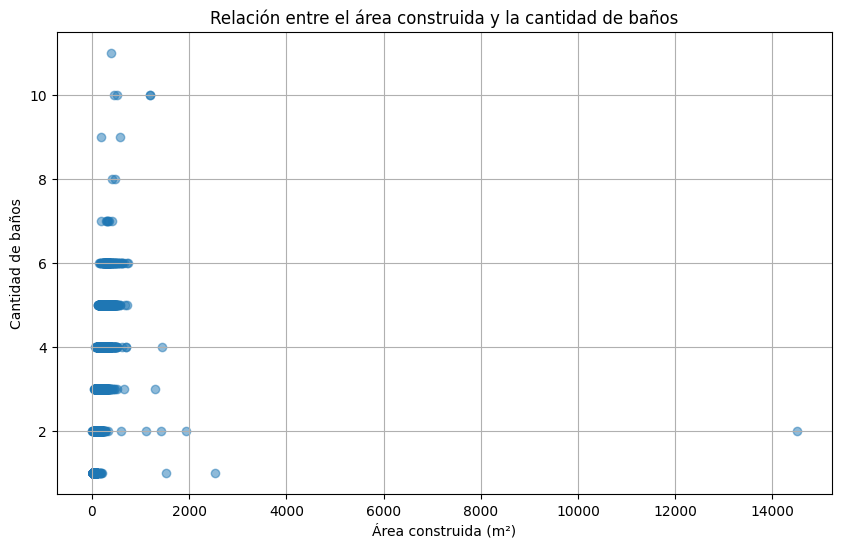

In [55]:
import matplotlib.pyplot as plt

# Crear un gráfico de dispersión para observar la relación entre 'constructed_area' y 'bathrooms'
plt.figure(figsize=(10, 6))
plt.scatter(data_cleaned['constructed_area'], data_cleaned['bathrooms'], alpha=0.5)
plt.title("Relación entre el área construida y la cantidad de baños")
plt.xlabel("Área construida (m²)")
plt.ylabel("Cantidad de baños")
plt.grid(True)
plt.show()

In [56]:
# Dividir el área construida en cuartiles para calcular la mediana de baños en cada intervalo
# Crear categorías basadas en los cuartiles del área construida
data_cleaned['area_interval'] = pd.qcut(data_cleaned['constructed_area'], q=4, labels=["Q1", "Q2", "Q3", "Q4"])

# Calcular la mediana de baños en cada intervalo de área, especificando observed=False para evitar advertencias futuras
median_bathrooms_by_area = data_cleaned.groupby('area_interval', observed=False)['bathrooms'].median().to_dict()

# Imputar valores faltantes en 'bathrooms' usando la mediana de su intervalo de área
data_cleaned['bathrooms'] = data_cleaned.apply(
    lambda row: median_bathrooms_by_area[row['area_interval']] if pd.isnull(row['bathrooms']) else row['bathrooms'], 
    axis=1
)

# Eliminar la columna 'area_interval' usada temporalmente para la imputación
data_cleaned.drop(columns=['area_interval'], inplace=True)


In [57]:
# Crear una copia para el análisis de correlación
data_for_correlation = data_cleaned.copy()

# Convertir 'age' a valores numéricos sin generar el FutureWarning
age_mapping = {
    'más de 30 años': 35,
    '16 a 30 años': 23,
    '9 a 15 años': 12,
    '6 a 8 años': 7,
    '1 a 5 años': 3,
    '1 a 8 años': 4,
    'menor a 1 año': 0,
    'No reporta': None
}

# Reemplazar los valores de 'age' de forma segura usando .map() en lugar de .replace()
data_for_correlation['age'] = data_for_correlation['age'].map(age_mapping)

# Convertir 'age' a tipo float
data_for_correlation['age'] = data_for_correlation['age'].astype(float)

# Generar la matriz de correlación
correlation_matrix = data_for_correlation[['age', 'constructed_area', 'private_area', 'bathrooms', 'rooms', 'parking_spaces']].corr()

# Mostrar la matriz de correlación
correlation_matrix.sort_values('age', ascending=False)



,age,constructed_area,private_area,bathrooms,rooms,parking_spaces
age,1.000000,0.121058,0.162903,0.191006,0.236400,0.059958
rooms,0.236400,0.259161,0.308750,0.558948,1.000000,0.352823
bathrooms,0.191006,0.374197,0.454087,1.000000,0.558948,0.655640
private_area,0.162903,0.323548,1.000000,0.454087,0.308750,0.428568
constructed_area,0.121058,1.000000,0.323548,0.374197,0.259161,0.678858
parking_spaces,0.059958,0.678858,0.428568,0.655640,0.352823,1.000000


In [58]:
# Reemplazar valores nulos en 'age' con "No reporta" hay correlaciones muy débiles, es probable que los apartamentos
#antiguos tengas más habitaciones, sin embargo, el coeficiente no es suficiente para hacer esas inferencias
data_cleaned['age'] = data_cleaned['age'].fillna("No reporta")

In [59]:
# Dividir 'constructed_area' en intervalos (cuartiles) para calcular la media y mediana de 'rooms' en cada intervalo
data_cleaned['area_interval'] = pd.qcut(data_cleaned['constructed_area'], q=4, labels=["Q1", "Q2", "Q3", "Q4"])

# Calcular la media y mediana de habitaciones en cada intervalo de área construida
rooms_mean_median_by_area = data_cleaned.groupby('area_interval', observed=False)['rooms'].agg(['mean', 'median'])

# Eliminar la columna temporal 'area_interval'
data_cleaned.drop(columns=['area_interval'], inplace=True)

rooms_mean_median_by_area


,mean,median
area_interval,,
Q1,2.062905,2.0
Q2,2.539630,3.0
Q3,2.834691,3.0
Q4,3.333174,3.0


In [60]:
# Realizar la imputación en 'rooms' usando la mediana del número de habitaciones en cada intervalo de área construida

# Crear de nuevo la columna temporal 'area_interval' para clasificar las áreas en cuartiles
data_cleaned['area_interval'] = pd.qcut(data_cleaned['constructed_area'], q=4, labels=["Q1", "Q2", "Q3", "Q4"])

# Diccionario con la mediana de habitaciones por intervalo de área
rooms_median_by_area = data_cleaned.groupby('area_interval', observed=False)['rooms'].median().to_dict()

# Aplicar la imputación usando la mediana correspondiente a cada intervalo de área
data_cleaned['rooms'] = data_cleaned.apply(
    lambda row: rooms_median_by_area[row['area_interval']] if pd.isnull(row['rooms']) else row['rooms'], 
    axis=1
)

# Eliminar la columna 'area_interval' usada para la imputación
data_cleaned.drop(columns=['area_interval'], inplace=True)


In [61]:
# Calcular la media y mediana de 'parking_spaces' en función del área (cuartiles), habitaciones y estrato social

# Relación con el área construida (cuartiles)
data_cleaned['area_interval'] = pd.qcut(data_cleaned['constructed_area'], q=4, labels=["Q1", "Q2", "Q3", "Q4"])
parking_spaces_by_area = data_cleaned.groupby('area_interval', observed=False)['parking_spaces'].agg(['mean', 'median'])

# Relación con el número de habitaciones
parking_spaces_by_rooms = data_cleaned.groupby('rooms')['parking_spaces'].agg(['mean', 'median'])

# Relación con el estrato social
parking_spaces_by_social_stratum = data_cleaned.groupby('social_stratum')['parking_spaces'].agg(['mean', 'median'])

# Eliminar la columna construída 'area_interval'
data_cleaned.drop(columns=['area_interval'], inplace=True)

parking_spaces_by_area, parking_spaces_by_rooms, parking_spaces_by_social_stratum


(                   mean  median
 area_interval                  
 Q1             1.084821     1.0
 Q2             1.259666     1.0
 Q3             1.828967     2.0
 Q4             2.778426     3.0,
            mean  median
 rooms                  
 1.0    1.250890     1.0
 2.0    1.558185     1.0
 3.0    1.873310     2.0
 4.0    2.707214     2.0
 5.0    3.223529     3.0
 6.0    2.714286     3.0
 7.0    2.500000     2.5
 9.0    1.500000     1.5
 11.0   3.000000     3.0
 12.0   4.000000     4.0
 20.0   2.000000     2.0,
                     mean  median
 social_stratum                  
 1               1.500000     1.5
 2               1.260870     1.0
 3               1.100295     1.0
 4               1.277778     1.0
 5               1.864656     2.0
 6               2.385995     2.0
 Sin Definir     2.500000     2.5)

In [62]:
# Imputar 'parking_spaces' usando la mediana por intervalos de área construida
data_cleaned['area_interval'] = pd.qcut(data_cleaned['constructed_area'], q=4, labels=["Q1", "Q2", "Q3", "Q4"])
parking_spaces_median_by_area = data_cleaned.groupby('area_interval', observed=False)['parking_spaces'].median().to_dict()

# Imputar valores faltantes en 'parking_spaces' usando la mediana de su intervalo de área
data_cleaned['parking_spaces'] = data_cleaned.apply(
    lambda row: parking_spaces_median_by_area[row['area_interval']] if pd.isnull(row['parking_spaces']) else row['parking_spaces'],
    axis=1
)

# Imputación de valores restantes usando la mediana por número de habitaciones
remaining_nulls_rooms = data_cleaned['parking_spaces'].isnull().sum()
if remaining_nulls_rooms > 0:
    parking_spaces_median_by_rooms = data_cleaned.groupby('rooms')['parking_spaces'].median().to_dict()
    data_cleaned['parking_spaces'] = data_cleaned.apply(
        lambda row: parking_spaces_median_by_rooms[row['rooms']] if pd.isnull(row['parking_spaces']) else row['parking_spaces'],
        axis=1
    )

# Imputación valores restantes usando la mediana por estrato social
remaining_nulls_social_stratum = data_cleaned['parking_spaces'].isnull().sum()
if remaining_nulls_social_stratum > 0:
    parking_spaces_median_by_stratum = data_cleaned.groupby('social_stratum')['parking_spaces'].median().to_dict()
    data_cleaned['parking_spaces'] = data_cleaned.apply(
        lambda row: parking_spaces_median_by_stratum[row['social_stratum']] if pd.isnull(row['parking_spaces']) else row['parking_spaces'],
        axis=1
    )

# Eliminar la columna temporal 'area_interval'
data_cleaned.drop(columns=['area_interval'], inplace=True)


In [63]:
# Calcular la media y mediana del costo de administración en función del estrato social
administration_by_social_stratum = data_cleaned.groupby('social_stratum')['administration'].agg(['mean', 'median'])

administration_by_social_stratum


,mean,median
social_stratum,,
1,2.005430e+05,78500.0
2,5.117757e+05,95000.0
3,1.695006e+06,170000.0
4,2.076091e+06,370000.0
5,3.847298e+06,655000.0
6,5.247202e+06,1139000.0
Sin Definir,NaN,NaN


In [64]:
# Calcular la moda de 'social_stratum' por 'main_location' en lugar de la mediana
mode_stratum_by_location = data_cleaned.groupby('main_location')['social_stratum'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None).to_dict()

# Reemplazar los valores faltantes de 'social_stratum' usando la moda del barrio
data_cleaned['social_stratum'] = data_cleaned.apply(
    lambda row: mode_stratum_by_location[row['main_location']] if pd.isnull(row['social_stratum']) else row['social_stratum'], 
    axis=1
)

# Verificar si quedan valores nulos en 'social_stratum'
remaining_nulls_social_stratum = data_cleaned['social_stratum'].isnull().sum()

remaining_nulls_social_stratum


np.int64(0)

In [65]:
# Convertir 'bathrooms', 'rooms' y 'parking_spaces' a enteros para una representación consistente
data_cleaned['bathrooms'] = data_cleaned['bathrooms'].astype(int)
data_cleaned['rooms'] = data_cleaned['rooms'].astype(int)
data_cleaned['parking_spaces'] = data_cleaned['parking_spaces'].astype(int)

# Verificar los primeros valores de estas columnas para confirmar la conversión
data_cleaned[['bathrooms', 'rooms', 'parking_spaces']].head()


,bathrooms,rooms,parking_spaces
0,2,2,1
1,2,2,2
2,3,3,2
3,5,5,4
4,2,3,1


In [66]:
# Imputar los valores faltantes en 'floor_number' con "No reporta"
data_cleaned['floor_number'] = data_cleaned['floor_number'].fillna("No reporta")

# Reemplazar los valores nulos en 'administration' con "No reporta"
data_cleaned['administration'] = data_cleaned['administration'].fillna("No reporta")


In [67]:
# Contar los valores nulos en cada columna del dataset
null_counts = data_cleaned.isnull().sum()

null_counts

price               0
address             0
coordinates_lat     0
coordinates_lng     0
main_location       0
link                0
social_stratum      0
state               0
bathrooms           0
constructed_area    0
private_area        0
age                 0
rooms               0
parking_spaces      0
administration      0
floor_number        0
in_polygon          0
finca_raiz_id       0
dtype: int64

In [68]:
# Guardar el dataframe limpio con los valores imputados como un archivo CSV para usar en el modelo
output_file_path = '../limpieza_y_analisis_de_datos/cleaned_data_for_regression.csv'
data_cleaned.to_csv(output_file_path, index=False)

# Proporcionar el enlace para descargar el archivo
output_file_path


'../limpieza_y_analisis_de_datos/cleaned_data_for_regression.csv'